<a href="https://colab.research.google.com/github/AniketDessai/AAIC_files/blob/assignment5/Assignment_5_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [10]:
# using the threshold value of 0.5 we compute the following
url = 'https://raw.githubusercontent.com/AniketDessai/AAIC_files/assignment5/5_a.csv'
data = pd.read_csv(url)

data['y_hat'] = data['proba'].apply(lambda y: 1 if y > 0.5 else 0)

TN, FP, FN, TP = 0, 0 ,0 ,0
cor_class=0

for z in range(len(data.proba)):
        
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 0:
            TN+=1
            cor_class+=1
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
            FP+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
            FN+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 1:
            TP+=1
            cor_class+=1

precision = TP/(TP+FP)
recall =  TP/(TP+FN)    
f1_score = (2*precision*recall)/(precision*recall)    
confusion_m = np.array([[TN, FN], [FP, TP]])
accuracy_score = cor_class/len(data.proba) 
print(' Precision:', precision,'\n','Recall:', recall, '\n','F1 Score:', f1_score, '\n'' Confusion Matrix:','\n',confusion_m, '\n', 'Accuracy score:', accuracy_score)


 Precision: 0.9900990099009901 
 Recall: 1.0 
 F1 Score: 2.0 
 Confusion Matrix: 
 [[    0     0]
 [  100 10000]] 
 Accuracy score: 0.9900990099009901


Runtime of the program is 309.8427064418793


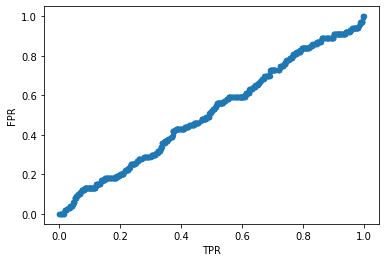

In [21]:
import random, time
start = time.time()

data = pd.read_csv(url)
taus=[]
index_tau = sorted(random.sample(range(1, len((data.proba))+1), 1000))
for q in index_tau:
    taus.append(data.proba[q])
TPR=[]
FPR=[]
for tau in sorted(taus, reverse=True):    
    
    TN, FP, FN, TP = 0, 0 ,0 ,0
     
    data['y_hat'] = data['proba'].apply(lambda y: 1 if y > tau else 0)
    
    for z in range(len(data.proba)):
        
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 0:
            TN+=1
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
            FP+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
            FN+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 1:
            TP+=1
    
    TPR.append(TP/(TP+FN))
    FPR.append(FP/(TN+FP)) 
    
plot_data = pd.DataFrame()   
plot_data['TPR']=np.array(TPR)
plot_data['FPR']=np.array(FPR)

plot_data.plot(kind = 'scatter', x = 'TPR', y = 'FPR')
end = time.time()
print(f"Runtime of the program is {end - start}")
print('AUC score:', np.trapz(np.array(TPR), np.array(FPR)))

0.48828550000000004
0.9900990099009901 1.0 2.0


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
# using the threshold value of 0.5 we compute the following
url = 'https://raw.githubusercontent.com/AniketDessai/AAIC_files/assignment5/5_b.csv'
data = pd.read_csv(url)

data['y_hat'] = data['proba'].apply(lambda y: 1 if y > 0.5 else 0)

TN, FP, FN, TP = 0, 0 ,0 ,0
cor_class=0

for z in range(len(data.proba)):
        
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 0:
            TN+=1
            cor_class+=1
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
            FP+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
            FN+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 1:
            TP+=1
            cor_class+=1

precision = TP/(TP+FP)
recall =  TP/(TP+FN)    
f1_score = (2*precision*recall)/(precision*recall)    
confusion_m = np.array([[TN, FN], [FP, TP]])
accuracy_score = cor_class/len(data.proba) 
print(' Precision:', precision,'\n','Recall:', recall, '\n','Confusion Matrix:','\n', confusion_m, '\n', 'Accuracy score:', accuracy_score)


 Precision: 0.1870748299319728 
 Recall: 0.55 
 Confusion Matrix: 
 [[9761   45]
 [ 239   55]] 
 Accuracy score: 0.9718811881188119


Runtime of the program is 312.25076961517334
AUC score: 0.9361215


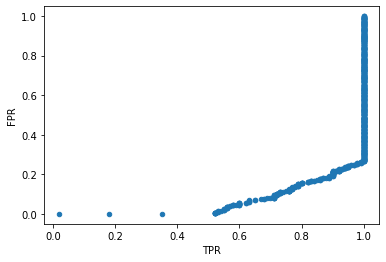

In [4]:
import random, time
start = time.time()

data = pd.read_csv(url)
taus=[]
index_tau = sorted(random.sample(range(1, len((data.proba))+1), 1000))
for q in index_tau:
    taus.append(data.proba[q])
TPR=[]
FPR=[]
for tau in sorted(taus, reverse=True):    
    
    TN, FP, FN, TP = 0, 0 ,0 ,0
     
    data['y_hat'] = data['proba'].apply(lambda y: 1 if y > tau else 0)
    
    for z in range(len(data.proba)):
        
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 0:
            TN+=1
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
            FP+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
            FN+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 1:
            TP+=1
    
    TPR.append(TP/(TP+FN))
    FPR.append(FP/(TN+FP)) 
    
plot_data = pd.DataFrame()   
plot_data['TPR']=np.array(TPR)
plot_data['FPR']=np.array(FPR)

plot_data.plot(kind = 'scatter', x = 'TPR', y = 'FPR')
end = time.time()
print(f"Runtime of the program is {end - start}")
print('AUC score:', np.trapz(np.array(TPR), np.array(FPR)))

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

Runtime of the program is 44.471808671951294
Threshold         0.028964
A            141000.000000
dtype: float64
Threshold value for lowest A is  0.22987164436159915


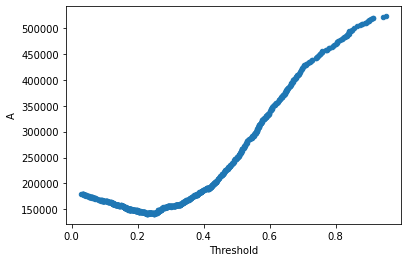

In [42]:
import random, time
start = time.time()

url = 'https://raw.githubusercontent.com/AniketDessai/AAIC_files/assignment5/5_c.csv'
data = pd.read_csv(url)
data
thresholds = []
metric_As = []
taus=[]
index_tau = sorted(random.sample(range(1, len((data.prob))+1), 1000))
for q in index_tau:
    taus.append(data.prob[q])

for tau in sorted(taus, reverse=True):  

    false_negative = 0
    false_positive = 0  
    
    data['y_hat'] = data['prob'].apply(lambda y: 1 if y > tau else 0)
    
    for z in range(len(data.prob)):
        
        if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
            false_positive+=1
        if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
            false_negative+=1
  
    thresholds.append(tau)
    A = 500*false_negative + 100*false_positive
    metric_As.append(A)
plot_data = pd.DataFrame()   
plot_data['Threshold']=np.array(thresholds)
plot_data['A']=np.array(metric_As)

plot_data.plot(kind = 'scatter', x = 'Threshold', y = 'A')
end = time.time()
print(f"Runtime of the program is {end - start}")
print(plot_data.min())
low_A=plot_data.loc[plot_data['A'] == plot_data.min()[1]].Threshold
print('Threshold value for lowest A is',float(low_A))

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [43]:
import random, time
start = time.time()

url = 'https://raw.githubusercontent.com/AniketDessai/AAIC_files/assignment5/5_d.csv'
data = pd.read_csv(url)
data
# thresholds = []
# metric_As = []
# taus=[]
# index_tau = sorted(random.sample(range(1, len((data.prob))+1), 1000))
# for q in index_tau:
#     taus.append(data.prob[q])

# for tau in sorted(taus, reverse=True):  

#     false_negative = 0
#     false_positive = 0  
    
#     data['y_hat'] = data['prob'].apply(lambda y: 1 if y > tau else 0)
    
#     for z in range(len(data.prob)):
        
#         if data.at[z,'y']== 0 and data.at[z,'y_hat']== 1:
#             false_positive+=1
#         if data.at[z,'y']== 1 and data.at[z,'y_hat']== 0:
#             false_negative+=1
  
#     thresholds.append(tau)
#     A = 500*false_negative + 100*false_positive
#     metric_As.append(A)
# plot_data = pd.DataFrame()   
# plot_data['Threshold']=np.array(thresholds)
# plot_data['A']=np.array(metric_As)

# plot_data.plot(kind = 'scatter', x = 'Threshold', y = 'A')
# end = time.time()
# print(f"Runtime of the program is {end - start}")
# print(plot_data.min())
# low_A=plot_data.loc[plot_data['A'] == plot_data.min()[1]].Threshold
# print('Threshold value for lowest A is',float(low_A))

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
...,...,...
157195,87.0,83.0
157196,97.0,86.0
157197,106.0,93.0
157198,105.0,101.0
